In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import reuters
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, SimpleRNN, Activation, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from numpy.core.fromnumeric import shape
from keras import metrics

In [ ]:
num_words = None
maxlen = 50
test_split = 0.3
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)
x_train = pad_sequences(x_train, padding = 'post')
x_test = pad_sequences(x_test, padding = 'post')
x_train = np.array(x_train).reshape((x_train.shape[0],x_train.shape[1],1))
x_test = np.array(x_test).reshape((x_test.shape[0],x_test.shape[1],1))
y_data = np.concatenate((y_train,y_test))
y_data = to_categorical(y_data)
y_train = y_data[:1395]
y_test = y_data[1395:]

In [ ]:
ls = Sequential()
ls.add(LSTM(50, input_shape=(49,1)))
ls.add(Dense(46))
ls.add(Activation('softmax'))
adam = Adam(lr = 0.001)
ls.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
ls.fit(x_train,y_train, epochs = 10, validation_split=0.3)

Epoch 1/5
31/31 [==============================] - 6s 98ms/step - loss: 3.0503 - accuracy: 0.5922 - val_loss: 1.5269 - val_accuracy: 0.7160
Epoch 2/5
31/31 [==============================] - 2s 82ms/step - loss: 1.2840 - accuracy: 0.7141 - val_loss: 1.1745 - val_accuracy: 0.7160
Epoch 3/5
31/31 [==============================] - 1s 37ms/step - loss: 1.1585 - accuracy: 0.7141 - val_loss: 1.1173 - val_accuracy: 0.7160
Epoch 4/5
31/31 [==============================] - 2s 55ms/step - loss: 1.1114 - accuracy: 0.7141 - val_loss: 1.0883 - val_accuracy: 0.7160
Epoch 5/5
31/31 [==============================] - 1s 30ms/step - loss: 1.0589 - accuracy: 0.7141 - val_loss: 0.9896 - val_accuracy: 0.7160


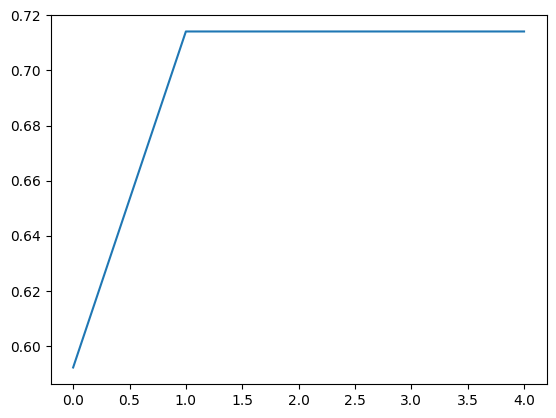

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ls.history.history['accuracy'])

In [ ]:
rn = Sequential()
rn.add(SimpleRNN(50, input_shape=(49,1)))
rn.add(Dense(46))
rn.add(Activation('softmax'))
adam = Adam(lr = 0.0001)
rn.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
rn.fit(x_train,y_train, epochs = 5, validation_split=0.3)

Epoch 1/5
31/31 [==============================] - 4s 91ms/step - loss: 3.0816 - accuracy: 0.4037 - val_loss: 1.7242 - val_accuracy: 0.7160
Epoch 2/5
31/31 [==============================] - 1s 41ms/step - loss: 1.3767 - accuracy: 0.7141 - val_loss: 1.2105 - val_accuracy: 0.7160
Epoch 3/5
31/31 [==============================] - 1s 44ms/step - loss: 1.2163 - accuracy: 0.7141 - val_loss: 1.1672 - val_accuracy: 0.7160
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 1.1880 - accuracy: 0.7141 - val_loss: 1.1580 - val_accuracy: 0.7160
Epoch 5/5
31/31 [==============================] - 1s 28ms/step - loss: 1.1760 - accuracy: 0.7141 - val_loss: 1.1524 - val_accuracy: 0.7160


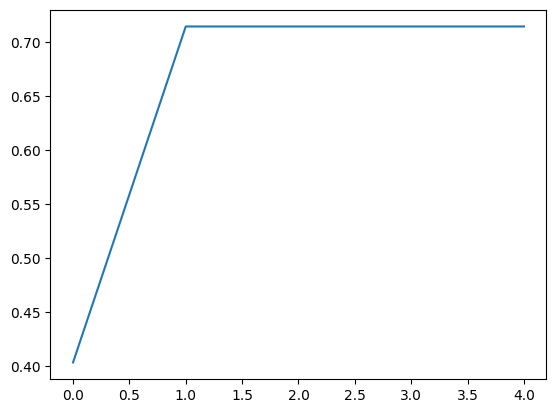

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rn.history.history['accuracy'])